In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity

from models.MeTooDataset import MeTooDataset, MeTooDataSubset
from models import SentenceEmbeddings

In [2]:
experiment_name = '7C'

In [3]:
algorithm_name = 'embeddings'

In [4]:
profile_ids = [783214, 19568591, 25073877, 103018203, 256881576, 810619093749559296]

In [5]:
labels = list('ABCDEF')

# Time Frame October and November 2017

# Target Classification

In [6]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='target_training'
)

In [7]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='target_testing_over_time',
    time_frame='oct_nov'
)

In [8]:
target_predictions = SentenceEmbeddings.train_and_predict(
    target_training_dataset,
    target_testing_dataset
)

[LibLinear]

In [9]:
predicted_idx_and_user_ids_objectification_of_women = []
predicted_idx_and_user_ids_gender_equality = []
predicted_idx_and_user_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [10]:
for idx, (label, tweet, user_id) in enumerate(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_idx_and_user_ids_objectification_of_women.append((idx, user_id))
    elif label == 1:
        predicted_idx_and_user_ids_gender_equality.append((idx, user_id))
    elif label == 2:
        predicted_idx_and_user_ids_conservatism.append((idx, user_id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

In [11]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='stance_training',
    target='Objectification of Women'
)

In [12]:
predicted_idx_objectification_of_women = [
    idx for idx, _ in predicted_idx_and_user_ids_objectification_of_women
]

In [13]:
stance_testing_dataset_objectification_of_women = MeTooDataSubset(
    root='/home/nils/Documents/thesis/data',
    indices=predicted_idx_objectification_of_women,
    mode='word_embeddings',
    task='target_testing',
)

In [14]:
predictions_objectification_of_women = SentenceEmbeddings.train_and_predict(
    stance_training_dataset_objectification_of_women,
    stance_testing_dataset_objectification_of_women
)

[LibLinear]

In [15]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_idx_and_user_ids_objectification_of_women
        ]
    )
)

In [16]:
stances_objectification_of_women = {}

In [17]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [18]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

In [19]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='stance_training',
    target='Gender Equality'
)

In [20]:
predicted_idx_gender_equality = [
    idx for idx, _ in predicted_idx_and_user_ids_gender_equality
]

In [21]:
stance_testing_dataset_gender_equality = MeTooDataSubset(
    root='/home/nils/Documents/thesis/data',
    indices=predicted_idx_gender_equality,
    mode='word_embeddings',
    task='target_testing',
)

In [22]:
predictions_gender_equality = SentenceEmbeddings.train_and_predict(
    stance_training_dataset_gender_equality,
    stance_testing_dataset_gender_equality
)

[LibLinear]

In [23]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_idx_and_user_ids_gender_equality
        ]
    )
)

In [24]:
stances_gender_equality = {}

In [25]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [26]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

No Tweet has been predicted as `Conservatism`, thus further processing is skipped and `stances_conservatism` is assumed to be an empty `dict`.

In [27]:
stances_conservatism = {}

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [28]:
profile_vectors_oct_nov = {
    user_id: np.array(
        [[
            stances_objectification_of_women.get(user_id, 1.0),
            stances_gender_equality.get(user_id, 1.0),
            stances_conservatism.get(user_id, 1.0)
        ]]
    )
    
    for user_id in profile_ids
}

# Time Frame December and January 2017/2018

# Target Classification

In [29]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='target_training'
)

In [30]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='target_testing_over_time',
    time_frame='dec_jan'
)

In [31]:
target_predictions = SentenceEmbeddings.train_and_predict(
    target_training_dataset,
    target_testing_dataset
)

[LibLinear]

In [32]:
predicted_idx_and_user_ids_objectification_of_women = []
predicted_idx_and_user_ids_gender_equality = []
predicted_idx_and_user_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [33]:
for idx, (label, tweet, user_id) in enumerate(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_idx_and_user_ids_objectification_of_women.append((idx, user_id))
    elif label == 1:
        predicted_idx_and_user_ids_gender_equality.append((idx, user_id))
    elif label == 2:
        predicted_idx_and_user_ids_conservatism.append((idx, user_id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

In [34]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='stance_training',
    target='Objectification of Women'
)

In [35]:
predicted_idx_objectification_of_women = [
    idx for idx, _ in predicted_idx_and_user_ids_objectification_of_women
]

In [36]:
stance_testing_dataset_objectification_of_women = MeTooDataSubset(
    root='/home/nils/Documents/thesis/data',
    indices=predicted_idx_objectification_of_women,
    mode='word_embeddings',
    task='target_testing',
)

In [37]:
predictions_objectification_of_women = SentenceEmbeddings.train_and_predict(
    stance_training_dataset_objectification_of_women,
    stance_testing_dataset_objectification_of_women
)

[LibLinear]

In [38]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_idx_and_user_ids_objectification_of_women
        ]
    )
)

In [39]:
stances_objectification_of_women = {}

In [40]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [41]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

In [42]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='stance_training',
    target='Gender Equality'
)

In [43]:
predicted_idx_gender_equality = [
    idx for idx, _ in predicted_idx_and_user_ids_gender_equality
]

In [44]:
stance_testing_dataset_gender_equality = MeTooDataSubset(
    root='/home/nils/Documents/thesis/data',
    indices=predicted_idx_gender_equality,
    mode='word_embeddings',
    task='target_testing',
)

In [45]:
predictions_gender_equality = SentenceEmbeddings.train_and_predict(
    stance_training_dataset_gender_equality,
    stance_testing_dataset_gender_equality
)

[LibLinear]

In [46]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_idx_and_user_ids_gender_equality
        ]
    )
)

In [47]:
stances_gender_equality = {}

In [48]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [49]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

No Tweet has been predicted as `Conservatism`, thus further processing is skipped and `stances_conservatism` is assumed to be an empty `dict`.

In [50]:
stances_conservatism = {}

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [51]:
profile_vectors_dec_jan = {
    user_id: np.array(
        [[
            stances_objectification_of_women.get(user_id, 1.0),
            stances_gender_equality.get(user_id, 1.0),
            stances_conservatism.get(user_id, 1.0)
        ]]
    )
    
    for user_id in profile_ids
}

# Time Frame February and March 2018

# Target Classification

In [52]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='target_training'
)

In [53]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='target_testing_over_time',
    time_frame='feb_mar'
)

In [54]:
target_predictions = SentenceEmbeddings.train_and_predict(
    target_training_dataset,
    target_testing_dataset
)

[LibLinear]

In [55]:
predicted_idx_and_user_ids_objectification_of_women = []
predicted_idx_and_user_ids_gender_equality = []
predicted_idx_and_user_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [56]:
for idx, (label, tweet, user_id) in enumerate(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_idx_and_user_ids_objectification_of_women.append((idx, user_id))
    elif label == 1:
        predicted_idx_and_user_ids_gender_equality.append((idx, user_id))
    elif label == 2:
        predicted_idx_and_user_ids_conservatism.append((idx, user_id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

In [57]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='stance_training',
    target='Objectification of Women'
)

In [58]:
predicted_idx_objectification_of_women = [
    idx for idx, _ in predicted_idx_and_user_ids_objectification_of_women
]

In [59]:
stance_testing_dataset_objectification_of_women = MeTooDataSubset(
    root='/home/nils/Documents/thesis/data',
    indices=predicted_idx_objectification_of_women,
    mode='word_embeddings',
    task='target_testing',
)

In [60]:
predictions_objectification_of_women = SentenceEmbeddings.train_and_predict(
    stance_training_dataset_objectification_of_women,
    stance_testing_dataset_objectification_of_women
)

[LibLinear]

In [61]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_idx_and_user_ids_objectification_of_women
        ]
    )
)

In [62]:
stances_objectification_of_women = {}

In [63]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [64]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

In [65]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='stance_training',
    target='Gender Equality'
)

In [66]:
predicted_idx_gender_equality = [
    idx for idx, _ in predicted_idx_and_user_ids_gender_equality
]

In [67]:
stance_testing_dataset_gender_equality = MeTooDataSubset(
    root='/home/nils/Documents/thesis/data',
    indices=predicted_idx_gender_equality,
    mode='word_embeddings',
    task='target_testing',
)

In [68]:
predictions_gender_equality = SentenceEmbeddings.train_and_predict(
    stance_training_dataset_gender_equality,
    stance_testing_dataset_gender_equality
)

[LibLinear]

In [69]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_idx_and_user_ids_gender_equality
        ]
    )
)

In [70]:
stances_gender_equality = {}

In [71]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [72]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

No Tweet has been predicted as `Conservatism`, thus further processing is skipped and `stances_conservatism` is assumed to be an empty `dict`.

In [73]:
stances_conservatism = {}

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [74]:
profile_vectors_feb_mar = {
    user_id: np.array(
        [[
            stances_objectification_of_women.get(user_id, 1.0),
            stances_gender_equality.get(user_id, 1.0),
            stances_conservatism.get(user_id, 1.0)
        ]]
    )
    
    for user_id in profile_ids
}

# Evaluation

In [75]:
metoo_vector = np.array([[0, 2, 0]])

In [76]:
profile_vectors = {
    user_id: {
        'Objectification of Women': [
            profile_vectors_oct_nov[user_id][0][0],
            profile_vectors_dec_jan[user_id][0][0],
            profile_vectors_feb_mar[user_id][0][0]
        ],
        'Gender Equality': [
            profile_vectors_oct_nov[user_id][0][1],
            profile_vectors_dec_jan[user_id][0][1],
            profile_vectors_feb_mar[user_id][0][1]
        ],
        'Conservatism': [
            profile_vectors_oct_nov[user_id][0][2],
            profile_vectors_dec_jan[user_id][0][2],
            profile_vectors_feb_mar[user_id][0][2]
        ]
    }
    
    
    for user_id in profile_ids
}

In [77]:
df_objectification_of_women = pd.DataFrame.from_records(
    {
        user_id: profile_vectors[user_id]['Objectification of Women'] 
        for user_id in profile_ids
    }, 
    index=['Oct/Nov', 'Dec/Jan', 'Feb/Mar']
).transpose().applymap(lambda x: x - 1.0)

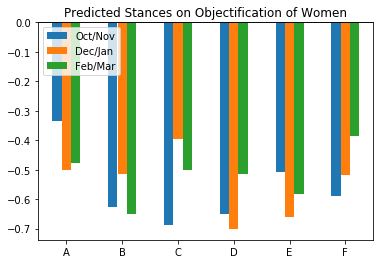

In [78]:
df_objectification_of_women.plot(kind='bar', title=f'Predicted Stances on Objectification of Women', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)

plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_objectification_of_women.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [79]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data{experiment_name}_{algorithm_name}_objectification_of_women.tex', 'w', encoding='utf-8') as f:
    df_objectification_of_women.to_latex(f)

In [80]:
df_gender_equality = pd.DataFrame.from_records(
    {
        user_id: profile_vectors[user_id]['Gender Equality'] 
        for user_id in profile_ids
    }, 
    index=['Oct/Nov', 'Dec/Jan', 'Feb/Mar']
).transpose().applymap(lambda x: x - 1)

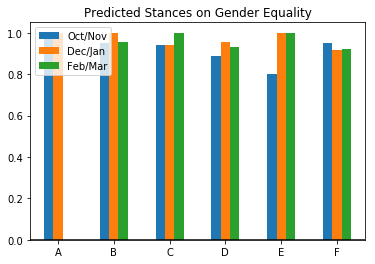

In [81]:
df_gender_equality.plot(kind='bar', title=f'Predicted Stances on Gender Equality', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)

plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_gender_equality.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [82]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data{experiment_name}_{algorithm_name}_gender_equality.tex', 'w', encoding='utf-8') as f:
    df_gender_equality.to_latex(f)

In [83]:
df_conservatism = pd.DataFrame.from_records(
    {
        user_id: profile_vectors[user_id]['Conservatism'] 
        for user_id in profile_ids
    }, 
    index=['Oct/Nov', 'Dec/Jan', 'Feb/Mar']
).transpose().applymap(lambda x: x - 1)

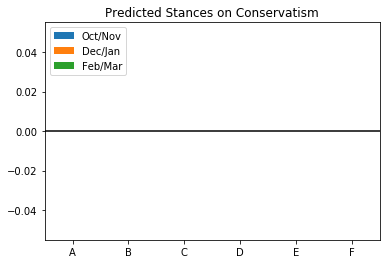

In [84]:
df_conservatism.plot(kind='bar', title=f'Predicted Stances on Conservatism', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)

plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_conservatism.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [85]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data{experiment_name}_{algorithm_name}_conservatism.tex', 'w', encoding='utf-8') as f:
    df_conservatism.to_latex(f)

In [86]:
profile_cosine_similarities = {
    user_id: [
        cosine_similarity(
            np.array([
                [
                    profile_vectors_oct_nov[user_id][0][0],
                    profile_vectors_oct_nov[user_id][0][1],
                    profile_vectors_oct_nov[user_id][0][2]
                ]
            ]),
            metoo_vector
        )[0][0],
        cosine_similarity(
            np.array([
                [
                    profile_vectors_dec_jan[user_id][0][0],
                    profile_vectors_dec_jan[user_id][0][1],
                    profile_vectors_dec_jan[user_id][0][2]
                ]
            ]),
            metoo_vector
        )[0][0],
        cosine_similarity(
            np.array([
                [
                    profile_vectors_feb_mar[user_id][0][0],
                    profile_vectors_feb_mar[user_id][0][1],
                    profile_vectors_feb_mar[user_id][0][2]
                ]
            ]),
            metoo_vector
        )[0][0]
    ]
    
    for user_id in profile_ids
}

In [87]:
df = pd.DataFrame(profile_cosine_similarities, index=['Oct/Nov', 'Dec/Jan', 'Feb/Mar']).transpose()

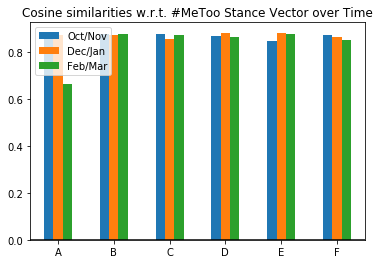

In [88]:
df.plot(kind='bar', title=f'Cosine similarities w.r.t. #MeToo Stance Vector over Time', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)

plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_similarities.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [89]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data{experiment_name}_{algorithm_name}_similarities.tex', 'w', encoding='utf-8') as f:
    df.to_latex(f)